In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.datasets 
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras import models, layers

In [3]:
import tensorflow as tf

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


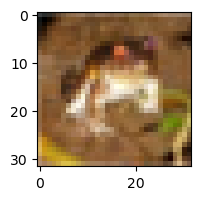

In [5]:
plt.figure(figsize = (15,2))
plt.imshow(x_train[0])

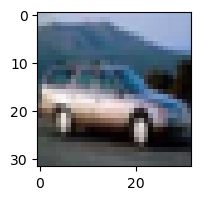

In [7]:
plt.figure(figsize = (15,2))
plt.imshow(x_train[4])

In [9]:
x_train[:5]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [17]:
y_test.shape

(10000, 1)

In [19]:
y_train.shape

(50000,)

In [21]:
# define the labels
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [35]:
#data exploration

In [23]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])


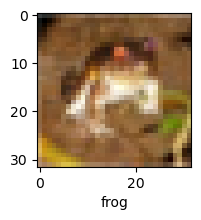

In [25]:
plot_sample(x_train, y_train, 0)

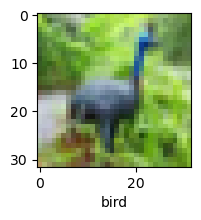

In [27]:
plot_sample(x_train, y_train, 6)

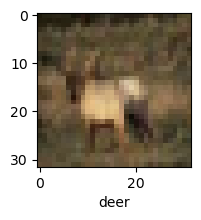

In [29]:
plot_sample(x_train, y_train, 3)

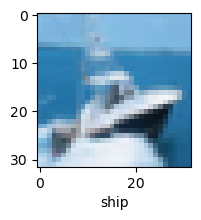

In [31]:
plot_sample(x_train, y_train, 8)

In [37]:
#building an ANN (artificial Neural Network)

In [39]:
ann = models.Sequential([
        layers.Flatten(input_shape =(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer = 'SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
ann.fit(x_train, y_train, epochs=5)
    

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 41ms/step - accuracy: 0.3050 - loss: 1.9302
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.4224 - loss: 1.6433
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.4557 - loss: 1.5451
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.4724 - loss: 1.4879
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4947 - loss: 1.4354


In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('Classification Report: \n', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.46      0.53      1000
           1       0.67      0.48      0.56      1000
           2       0.40      0.32      0.35      1000
           3       0.34      0.42      0.37      1000
           4       0.56      0.28      0.37      1000
           5       0.53      0.21      0.30      1000
           6       0.44      0.73      0.54      1000
           7       0.49      0.63      0.55      1000
           8       0.55      0.68      0.61      1000
           9       0.46      0.68      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.47     10000
weighted avg       0.51      0.49      0.47     10000



In [43]:
cnn = models.Sequential([
        layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation ='relu'),
        layers.Dense(10, activation ='softmax')
    ])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [47]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.3631 - loss: 1.7347
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5827 - loss: 1.1884
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6400 - loss: 1.0326
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6681 - loss: 0.9487
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6931 - loss: 0.8828
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7171 - loss: 0.8228
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7306 - loss: 0.7778
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7467 - loss: 0.7342
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7556 - loss: 0.7074
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7697 - loss: 0.6646


In [49]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 502,688 (1.92 MB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 335,126 (1.28 MB)

In [51]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6970 - loss: 0.8937


[0.9137304425239563, 0.6934000253677368]

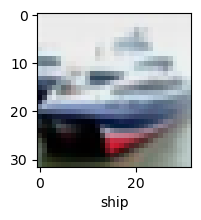

In [53]:
y_test = y_test.reshape(-1,)
plot_sample(x_test, y_test, 1)

In [55]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[9.3668868e-04, 8.8464614e-04, 6.6340943e-03, 5.5885082e-01,
        1.8606972e-03, 5.6414202e-02, 5.9846409e-02, 1.3339299e-03,
        3.0815971e-01, 5.0788019e-03],
       [6.2447302e-03, 1.1174127e-01, 8.4009198e-06, 8.3400266e-08,
        1.2078505e-06, 1.1147822e-08, 5.2599592e-08, 3.7856901e-07,
        8.8189757e-01, 1.0638982e-04],
       [6.0742164e-01, 4.5864023e-02, 4.8254761e-03, 4.8153594e-02,
        1.1726583e-03, 4.6776719e-03, 1.6516077e-03, 1.2658790e-02,
        2.5639743e-01, 1.7177118e-02],
       [7.1922410e-01, 2.0594282e-02, 4.8276675e-03, 3.5969557e-03,
        4.8490360e-02, 1.2531604e-04, 1.5131648e-04, 1.8960863e-03,
        2.0065464e-01, 4.3925448e-04],
       [1.4164327e-05, 4.9055117e-05, 2.2551391e-02, 4.8473321e-02,
        2.5457469e-01, 6.4574513e-03, 6.6777283e-01, 6.0789927e-05,
        2.7211399e-05, 1.9194511e-05]], dtype=float32)

In [57]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 6]

In [59]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [61]:
y_classes[:7]

[3, 8, 0, 0, 6, 6, 1]

In [63]:
y_test[:7]

array([3, 8, 8, 0, 6, 6, 1], dtype=uint8)

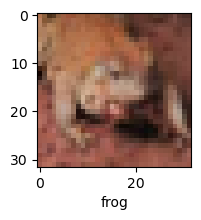

In [65]:
plot_sample(x_test, y_test, 5)

In [69]:
classes[y_classes[5]]

'frog'

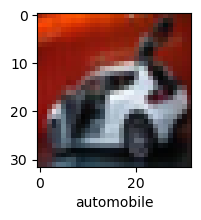

In [71]:
plot_sample(x_test, y_test, 6)

In [73]:
classes[y_classes[6]]

'automobile'

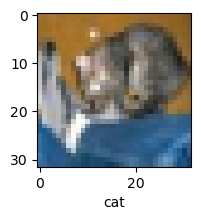

In [75]:
plot_sample(x_test, y_test, 0)

In [77]:
classes[y_classes[0]]

'cat'

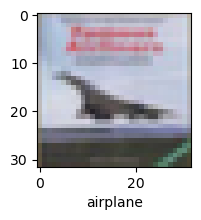

In [79]:
plot_sample(x_test, y_test, 3)

In [81]:
classes[y_classes[3]]

'airplane'

sample_object: None vs predicted_object: airplane


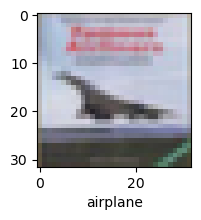

In [89]:
print(f'sample_object: {plot_sample(x_test, y_test, 3)} vs predicted_object: {classes[y_classes[3]]}')


sample_object:None vs predicted_object: automobile


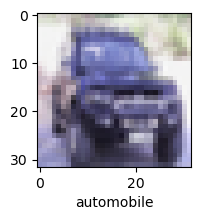

In [95]:
print(f'sample_object:{plot_sample(x_test, y_test, 9)} vs predicted_object: {classes[y_classes[9]]}')


sample_object: None vs predicted_object: automobile


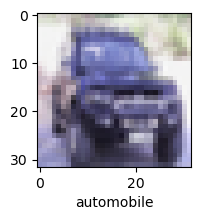

In [97]:
sample_label = plot_sample(x_test,y_test, 9)
print(f"sample_object: {sample_label} vs predicted_object: {classes[y_classes[9]]}")
